In [82]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr

In [83]:
df = pd.read_csv("training.csv")

In [84]:
ages = sorted(df['VehicleAge'].unique())
ages_mapping = dict(zip(ages, range(0, len(ages) + 1)))
df['VehicleAge_Val'] = df['VehicleAge'].map(ages_mapping).astype(int)

In [85]:
aucguarts = sorted(df['AUCGUART'].unique())
aucguart_mapping = dict(zip(aucguarts, range(0, len(aucguarts) + 1)))
df['AUCGUART_Val'] = df['AUCGUART'].map(aucguart_mapping).astype(int)

In [86]:
#Assume nan to be 'YELLOW'
aucguart_mapping

{nan: 0, 'GREEN': 1, 'RED': 2}

In [87]:
df.replace({'VNZIP1' : { np.nan : 48796}}, inplace=True)
df.replace({'VehBCost' : { np.nan : 6802}}, inplace=True)
df.replace({'WarrantyCost' : { np.nan : 1297}}, inplace=True)

In [88]:
df.dtypes[df.dtypes.map(lambda x: x == 'object')]

PurchDate               object
Auction                 object
Make                    object
Model                   object
Trim                    object
SubModel                object
Color                   object
Transmission            object
WheelType               object
Nationality             object
Size                    object
TopThreeAmericanName    object
PRIMEUNIT               object
AUCGUART                object
VNST                    object
dtype: object

In [89]:
df_train = df.drop(['PurchDate','Auction','Make','Model','Trim','SubModel','Color','Transmission','WheelType','Nationality','Size','TopThreeAmericanName','PRIMEUNIT','AUCGUART','VNST'], axis=1)
df_train = df_train.drop(['RefId','VehYear','WheelTypeID','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice','BYRNO','IsOnlineSale'], axis=1)
df_train.dtypes

IsBadBuy            int64
VehicleAge          int64
VehOdo              int64
VNZIP1            float64
VehBCost          float64
WarrantyCost      float64
VehicleAge_Val      int64
AUCGUART_Val        int64
dtype: object

In [90]:
from sklearn import preprocessing

In [91]:
df_train.head()

,IsBadBuy,VehicleAge,VehOdo,VNZIP1,VehBCost,WarrantyCost,VehicleAge_Val,AUCGUART_Val
0,0,3,89046,33619.0,7100.0,1113.0,2,0
1,0,5,93593,33619.0,7600.0,1053.0,4,0
2,0,4,73807,33619.0,4900.0,1389.0,3,0
3,0,5,65617,33619.0,4100.0,630.0,4,0
4,0,4,69367,33619.0,4000.0,1020.0,3,0


In [92]:
min_max_scaler = preprocessing.MinMaxScaler()
for k in df_train.columns:
    df_train[k] = min_max_scaler.fit_transform(df_train[k].values.astype(float))

/Users/Italo/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Italo/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/Italo/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your 

In [93]:
df_train.head()

,IsBadBuy,VehicleAge,VehOdo,VNZIP1,VehBCost,WarrantyCost,VehicleAge_Val,AUCGUART_Val
0,0.0,0.250,0.788667,0.375018,0.496939,0.107479,0.250,0.0
1,0.0,0.500,0.834406,0.375018,0.547959,0.097573,0.500,0.0
2,0.0,0.375,0.635376,0.375018,0.272449,0.153046,0.375,0.0
3,0.0,0.500,0.552992,0.375018,0.190816,0.027737,0.500,0.0
4,0.0,0.375,0.590713,0.375018,0.180612,0.092125,0.375,0.0


In [94]:
# Convert the DataFrame to a numpy array:
train_data = df_train.values
train_data

array([[ 0.        ,  0.25      ,  0.78866736, ...,  0.10747895,
         0.25      ,  0.        ],
       [ 0.        ,  0.5       ,  0.83440631, ...,  0.09757306,
         0.5       ,  0.        ],
       [ 0.        ,  0.375     ,  0.63537601, ...,  0.15304606,
         0.375     ,  0.        ],
       ..., 
       [ 0.        ,  0.375     ,  0.51911238, ...,  0.12431897,
         0.375     ,  0.        ],
       [ 0.        ,  0.375     ,  0.35197964, ...,  0.06141654,
         0.375     ,  0.        ],
       [ 0.        ,  0.5       ,  0.73101839, ...,  0.13785702,
         0.5       ,  0.        ]])

In [95]:
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [96]:
kmeans = KMeans(n_clusters = 3)

In [97]:
kmeans.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [98]:
list(kmeans.cluster_centers_[0])

[4.8711035205428743e-15,
 0.2685103763630009,
 0.59514937632788356,
 0.64326513316613865,
 0.5204957396254315,
 0.1254909175356107,
 0.2685103763630009,
 0.032360182905381778]

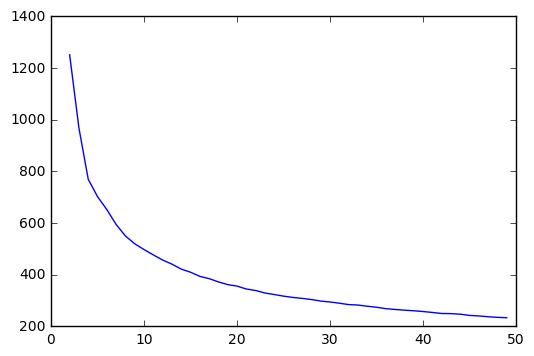

In [99]:
sse_list = list()
max_k = 50
for k in range(2,max_k):
    kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=100)
    kmeans.fit(train_data)
    sse = kmeans.inertia_
    sse_list.append(sse)
plt.plot(range(2,max_k), sse_list)

In [111]:
kmeans = KMeans(init='k-means++', n_clusters=8, n_init=10, max_iter=100)
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print 'centers', kmeans.cluster_centers_
print 'labels', dict(zip(bins, hist))
print 'sse', kmeans.inertia_
print 'silhouette', silhouette_score(train_data, kmeans.labels_)

centers [[ -6.10622664e-16   2.50341064e-01   5.97288057e-01   9.13615086e-01
    5.34147479e-01   1.29090151e-01   2.50341064e-01   2.91433544e-16]
 [  3.46944695e-16   4.44872276e-01   6.26322649e-01   3.96621061e-01
    4.70853356e-01   1.25990171e-01   4.44872276e-01  -8.74300632e-16]
 [ -8.04911693e-16   1.95012788e-01   5.99998280e-01   4.32427499e-01
    5.43576126e-01   1.30626623e-01   1.95012788e-01  -5.55111512e-16]
 [  1.00000000e+00   3.27266484e-01   5.87601000e-01   5.38756145e-01
    4.75936309e-01   1.13390737e-01   3.27266484e-01   1.37362637e-03]
 [  4.16333634e-16   5.18895349e-01   5.85854960e-01   9.39952133e-01
    4.01217032e-01   1.32822626e-01   5.18895349e-01   6.64451827e-03]
 [  1.00000000e+00   6.86468647e-01   6.99886654e-01   4.83974771e-01
    3.32267461e-01   2.05743457e-01   6.86468647e-01   9.90099010e-03]
 [  4.30211422e-16   7.42083333e-01   6.63584158e-01   4.06905072e-01
    3.33050170e-01   1.80077046e-01   7.42083333e-01   3.91666667e-02]
 [  1

In [112]:
df_clusters = df_train
df_clusters['Labels'] = kmeans.labels_

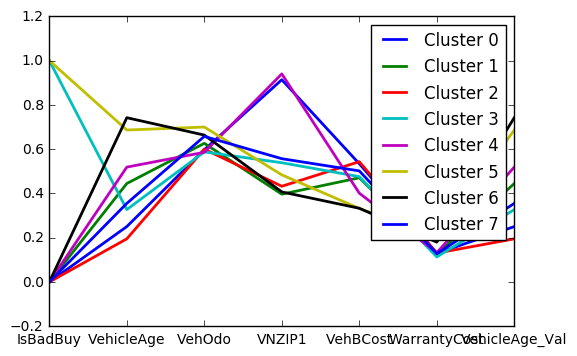

In [113]:
for i in range(0, 8):
    plt.plot(range(0, 7), kmeans.cluster_centers_[i][:-1], label='Cluster %s' % i, linewidth=2)
plt.xticks(range(0, 7), list(df_train.columns)[:-1])
plt.legend()

In [114]:
df_clusters.head()

,IsBadBuy,VehicleAge,VehOdo,VNZIP1,VehBCost,WarrantyCost,VehicleAge_Val,AUCGUART_Val,Labels
0,0.0,0.250,0.788667,0.375018,0.496939,0.107479,0.250,0.0,2
1,0.0,0.500,0.834406,0.375018,0.547959,0.097573,0.500,0.0,1
2,0.0,0.375,0.635376,0.375018,0.272449,0.153046,0.375,0.0,1
3,0.0,0.500,0.552992,0.375018,0.190816,0.027737,0.500,0.0,1
4,0.0,0.375,0.590713,0.375018,0.180612,0.092125,0.375,0.0,1


In [119]:
pclass_xt = pd.crosstab(df_clusters['VehicleAge'], df_clusters['Labels'])
pclass_xt

Labels,0,1,2,3,4,5,6,7
VehicleAge,,,,,,,,
0.000,9,0,45,6,0,0,0,12
0.125,173,0,432,45,0,0,0,60
0.250,358,0,690,110,0,0,0,55
0.375,193,682,6,124,185,0,0,83
0.500,0,554,0,79,231,59,3,76
0.625,0,94,0,0,109,106,239,38
0.750,0,0,0,0,64,82,194,1
0.875,0,0,0,0,13,42,124,1
1.000,0,0,0,0,0,14,41,0


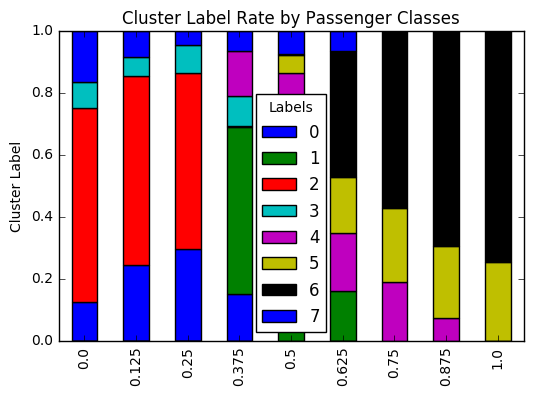

In [120]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by Passenger Classes')
plt.xlabel('')
plt.ylabel('Cluster Label')

In [121]:
df_clusters.describe()

,IsBadBuy,VehicleAge,VehOdo,VNZIP1,VehBCost,WarrantyCost,VehicleAge_Val,AUCGUART_Val,Labels
count,5432.000000,5432.000000,5432.000000,5432.000000,5432.000000,5432.000000,5432.000000,5432.000000,5432.000000
mean,0.122791,0.405905,0.619746,0.559486,0.466628,0.137863,0.405905,0.036175,2.683910
std,0.328227,0.208007,0.143750,0.260800,0.176804,0.097855,0.208007,0.131659,2.144924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.528840,0.375018,0.333673,0.064553,0.250000,0.000000,1.000000
50%,0.000000,0.375000,0.634370,0.513406,0.472959,0.124319,0.375000,0.000000,2.000000
75%,0.000000,0.500000,0.725322,0.842931,0.586224,0.192835,0.500000,0.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [122]:
df_clusters[df_clusters['Labels']==3].describe()

,IsBadBuy,VehicleAge,VehOdo,VNZIP1,VehBCost,WarrantyCost,VehicleAge_Val,AUCGUART_Val,Labels
count,364.0,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.0
mean,1.0,0.327266,0.587601,0.538756,0.475936,0.113391,0.327266,0.001374,3.0
std,0.0,0.126186,0.140095,0.250978,0.156074,0.086888,0.126186,0.026207,0.0
min,1.0,0.000000,0.059369,0.177962,0.134184,0.000000,0.000000,0.000000,3.0
25%,1.0,0.250000,0.491651,0.375018,0.354082,0.056298,0.250000,0.000000,3.0
50%,1.0,0.375000,0.599701,0.513406,0.476276,0.095097,0.375000,0.000000,3.0
75%,1.0,0.375000,0.691217,0.701067,0.573724,0.156678,0.375000,0.000000,3.0
max,1.0,0.500000,0.871273,1.000000,0.985204,0.764405,0.500000,0.500000,3.0


In [123]:
# hierarchical clustering
connectivity = kneighbors_graph(train_data, n_neighbors=100, include_self=False)
connectivity = 0.5 * (connectivity + connectivity.T)

In [124]:
print 'ward'
ward = AgglomerativeClustering(n_clusters=6, linkage='ward', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(train_data)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(train_data, ward.labels_)

ward
labels {0: 667, 1: 1910, 2: 1321, 3: 725, 4: 380, 5: 429}
silhouette 0.266980466016


In [125]:
print 'average linkage'
average_linkage = AgglomerativeClustering(n_clusters=6, linkage='average', affinity='manhattan',
                                              connectivity=connectivity)
average_linkage.fit(train_data)

hist, bins = np.histogram(average_linkage.labels_, 
                          bins=range(0, len(set(average_linkage.labels_)) + 1))

print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(train_data, average_linkage.labels_)

average linkage
labels {0: 5, 1: 659, 2: 7, 3: 3, 4: 4757, 5: 1}
silhouette 0.376368960171


In [126]:
print 'complete linkage'
complete_linkage = AgglomerativeClustering(n_clusters=6, linkage='complete', affinity='l1',
                                              connectivity=connectivity)
complete_linkage.fit(train_data)
hist, bins = np.histogram(complete_linkage.labels_, 
                          bins=range(0, len(set(complete_linkage.labels_)) + 1))

print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(train_data, complete_linkage.labels_)

complete linkage
labels {0: 4742, 1: 23, 2: 248, 3: 135, 4: 283, 5: 1}
silhouette 0.351127824099


In [127]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

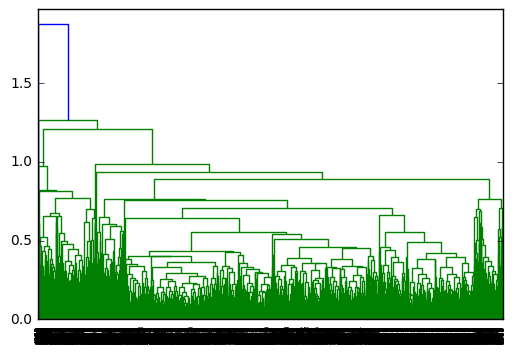

In [128]:
# average linkage and dendogram using scipy
data_dist = pdist(train_data, metric='euclidean')
data_link = linkage(data_dist, method='average', metric='euclidean')
res = dendrogram(data_link)

In [129]:
# density based clustering
print 'dbscan'

dbscan = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
dbscan.fit(train_data)

hist, bins = np.histogram(dbscan.labels_, bins=range(-1, len(set(dbscan.labels_)) + 1))

print 'labels', dict(zip(bins, hist))
print 'silhouette', silhouette_score(train_data, dbscan.labels_)

dbscan
labels {0: 4322, 1: 580, 2: 280, 3: 3, 4: 8, 5: 0, -1: 239}
silhouette 0.172097684561


In [130]:
df_clusters = df_train
df_clusters['Labels'] = dbscan.labels_

In [131]:
pclass_xt = pd.crosstab(df_clusters['IsBadBuy'], df_clusters['Labels'])
pclass_xt

Labels,-1,0,1,2,3,4
IsBadBuy,,,,,,
0.0,160,4322,0,280,3,0
1.0,79,0,580,0,0,8


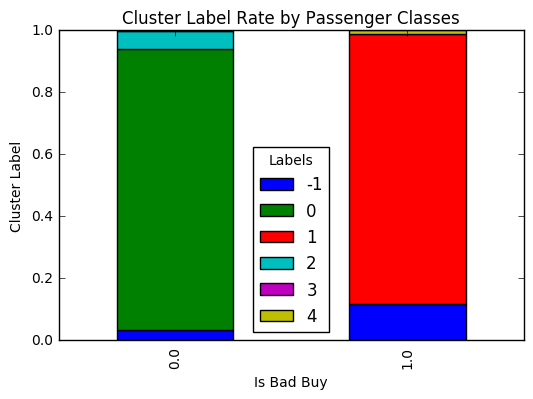

In [132]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct.plot(kind='bar', stacked=True, title='Cluster Label Rate by Passenger Classes')
plt.xlabel('Is Bad Buy')
plt.ylabel('Cluster Label')